# INDIAN HUMANS  AND OTHERS CLASSIFIER

# Verzeo Major Project February 
# BATCH: B_19

In [103]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.layers import Dense
from keras.utils import to_categorical
from keras.layers import Flatten,MaxPooling2D,Conv2D,LeakyReLU
from keras import optimizers


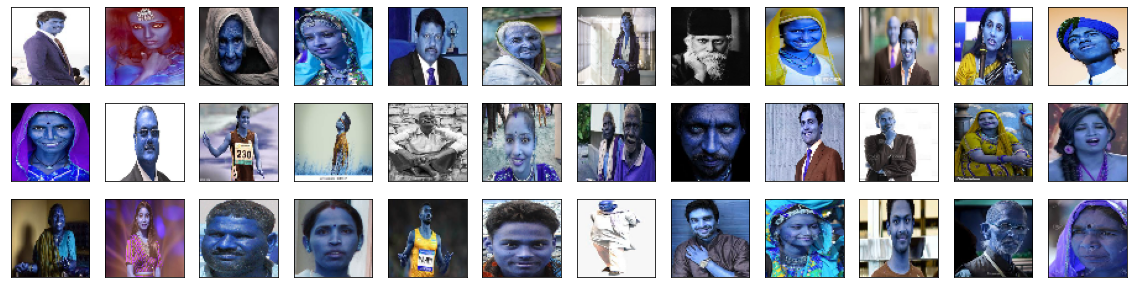

In [116]:
import cv2
import os
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            img1=cv2.resize(img,(64,64))
            images.append(img1)
    return images
#Load the images 
dark=load_images_from_folder('D:\dark')
fair=load_images_from_folder('D:\fair')
mild=load_images_from_folder('D:\mild')
foreigners=load_images_from_folder('D:\Foreigners')
non_humans=load_images_from_folder('D:\non-human images_')




train_dark = np.array(dark)
train_fair = np.array(fair)

train_mild = np.array(mild)
train_foreigners = np.array(foreigners)
train_non_humans = np.array(non_humans)



#Visualize the images 
fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3,12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(dark[i]))

In [117]:
train_dark_label=np.zeros(len(train_dark))
train_fair_label=np.ones(len(train_fair))
train_mild_label=np.full(len(train_mild),2)
train_foreigners_label=np.full(len(train_foreigners),3)
train_non_humans_label=np.full(len(train_non_humans),4)



print(train_dark.shape,train_dark_label.shape)
print(train_fair.shape,train_fair_label.shape)
print(train_mild.shape,train_mild_label.shape)
print(train_foreigners.shape,train_foreigners_label.shape)
print(train_non_humans.shape,train_non_humans_label.shape)


(123, 64, 64, 3) (123,)
(149, 64, 64, 3) (149,)
(251, 64, 64, 3) (251,)
(156, 64, 64, 3) (156,)
(214, 64, 64, 3) (214,)


In [118]:
#Concatenate 
X=np.concatenate((train_dark,train_fair,train_mild,train_foreigners,train_non_humans))
y=np.concatenate((train_dark_label,train_fair_label,train_mild_label,train_foreigners_label,train_non_humans_label))
y_label =to_categorical(y)

#Train -Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_label, test_size=0.02, random_state=0)
#Normalize the data
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train=X_train/255
X_test=X_test/255
print("Training Data",X_train.shape)
print("Testing Data",X_test.shape)

Training Data (875, 64, 64, 3)
Testing Data (18, 64, 64, 3)


In [119]:
#HyperParameters
batch_size = 64
epochs =10
num_classes = 5
input_shape=(64,64,3)
#Model Define
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3),activation='linear',input_shape=input_shape,padding='same'))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(LeakyReLU(alpha=0.01))  

model.add(Conv2D(64, kernel_size=(3,3),activation='linear',input_shape=input_shape,padding='same'))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(LeakyReLU(alpha=0.01))  

model.add(Conv2D(128, kernel_size=(3,3),activation='linear',input_shape=input_shape,padding='same'))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(LeakyReLU(alpha=0.01))  






model.add(Flatten())
model.add(Dense(128, activation='softmax'))
model.add(LeakyReLU(alpha=0.01))    





model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='Adam',metrics=['accuracy'])
model.summary()

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_93 (Conv2D)           (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_93 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
leaky_re_lu_82 (LeakyReLU)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_94 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
leaky_re_lu_83 (LeakyReLU)   (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_95 (Conv2D)           (None, 16, 16, 128)     

In [120]:
#np.random.seed(42)
model_1=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=64,shuffle=True)
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 875 samples, validate on 18 samples
Epoch 1/10
875/875 [==============================] - 6s 7ms/step - loss: 1.5889 - accuracy: 0.2663 - val_loss: 1.5242 - val_accuracy: 0.5556
Epoch 2/10
875/875 [==============================] - 6s 6ms/step - loss: 1.5736 - accuracy: 0.2754 - val_loss: 1.5213 - val_accuracy: 0.5556
Epoch 3/10
875/875 [==============================] - 5s 5ms/step - loss: 1.5701 - accuracy: 0.2754 - val_loss: 1.5160 - val_accuracy: 0.5556
Epoch 4/10
875/875 [==============================] - 5s 6ms/step - loss: 1.5594 - accuracy: 0.2880 - val_loss: 1.5194 - val_accuracy: 0.5556
Epoch 5/10
875/875 [==============================] - 5s 6ms/step - loss: 1.5298 - accuracy: 0.3177 - val_loss: 1.5322 - val_accuracy: 0.5556
Epoch 6/10
875/875 [==============================] - 5s 6ms/step - loss: 1.5164 - accuracy: 0.3326 - val_loss: 1.5179 - val_accuracy: 0.5556
Epoch 7/10
875/875 [==============================] - 5s 5ms/step - loss: 1.5100 - accuracy: 0.3189 - v

Test loss: 1.514981746673584
Test accuracy: 0.5


Text(0.5, 1.0, 'Training and validation loss')

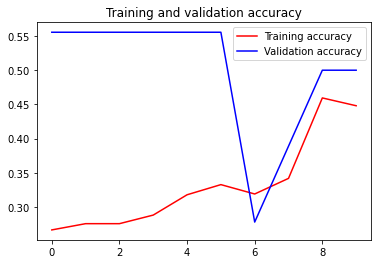

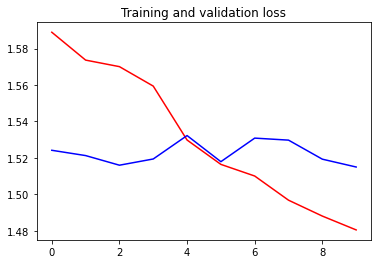

In [121]:
test_eval = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])
accuracy = model_1.history['accuracy']
val_accuracy = model_1.history['val_accuracy']
loss = model_1.history['loss']
val_loss = model_1.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')

In [122]:
from sklearn.metrics import confusion_matrix
y_test_pred=model.predict(X_test)
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_test_pred.argmax(axis=1))
cnf_matrix

array([[0, 0, 2, 0, 0],
       [0, 0, 2, 0, 1],
       [0, 0, 9, 0, 1],
       [0, 0, 1, 0, 1],
       [0, 0, 1, 0, 0]], dtype=int64)

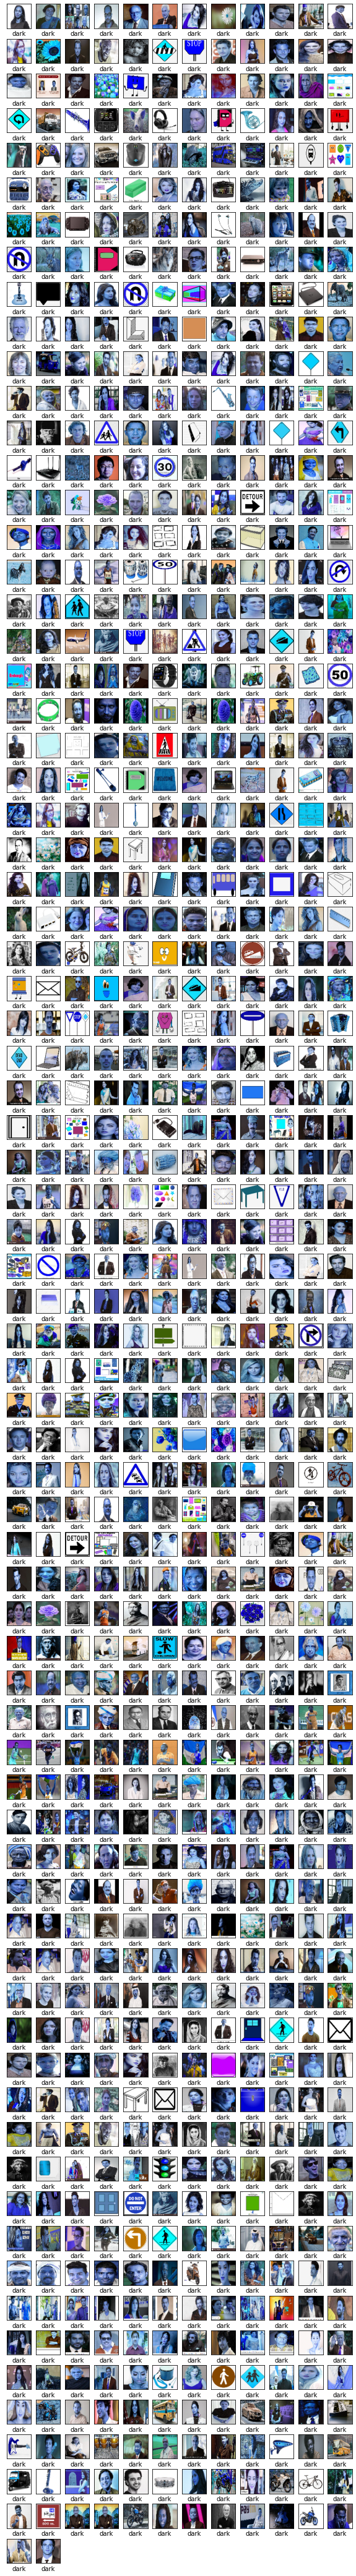

In [128]:
testdata= load_images_from_folder('D:\testing_data')
testimages=np.array(testdata)
predicted_classes = model.predict(testimages)
predicted_classes1 = np.argmax(np.round(predicted_classes),axis=1)
#Visualize the test data
fig = plt.figure(figsize=(10,100))
for i in range (878):
    ax = fig.add_subplot(97, 12, i+1,xticks=[], yticks=[])
    plt.imshow(testimages[i])
    if (predicted_classes1[i]==0):
        plt.xlabel('dark')
    if (predicted_classes1[i]==1):
        plt.xlabel('fair')
    if (predicted_classes1[i]==2):
        plt.xlabel('mild')
    if (predicted_classes1[i]==3):
        plt.xlabel('foreigners')
    if (predicted_classes1[i]==4):
        plt.xlabel('non_humans')
            
            

            
           
      


# THANK YOU :))
